<a href="https://colab.research.google.com/github/mahmud-nobe/Projects/blob/main/Causal_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## CS112 Final Project Notebook: Effect of empowerment of women on repoting crime rate

## Load and Preapre the Data

 This is what I did in my Rstudio to get the dataset in csv :



> `dataset = load("tables1to5.RData")`
 
 > `dataset`

> `# 'x'`

> `final.data = x`

> `head(final.data)`

> `write.csv(final.data, "tables1to5.csv")`



Then I upload it in github.

In [ ]:
url = "https://raw.githubusercontent.com/mahmud-nobe/CS112-Final-Project/master/tables1to5.csv"
data = read.csv(url)

In [ ]:
head(data)

,X,year,stateuni,ipop,imale,pcr_prop,pcr_order,pcr_econ,pmurder,pcr_womtot,⋯,lpstrape,lpstpoa,lpstpcr,lparrest_womcrime,lparrest_rape,lparrest_womgirl,lparrest_nonwomen,lparrest_kidmen,lpmurder_m,lpmurder_f
,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1985,ANDHRA PRADESH,58733007,29755186,0.3701837,0.01159484,0.12194166,0.02943830,0.06718931,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,2,1986,ANDHRA PRADESH,60028840,30416752,0.3218286,0.05244146,0.03141823,0.02663720,0.06629049,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,3,1987,ANDHRA PRADESH,61324674,31078317,0.3477393,0.01025688,0.14506397,0.02868340,0.05174177,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,4,1988,ANDHRA PRADESH,62620508,31739883,0.4270326,0.08220949,0.04052985,0.03265704,0.06434455,⋯,NA,NA,NA,-2.295828,-4.422112,-4.599128,-4.339221,-5.081269,NA,NA
5,5,1989,ANDHRA PRADESH,63916341,32401449,0.4614939,0.08195087,0.04596633,0.03595325,0.07145828,⋯,NA,NA,NA,-2.153817,-4.284273,-4.445257,-4.302086,-4.809580,NA,NA
6,6,1990,ANDHRA PRADESH,65212174,33063015,0.4658639,0.08265328,0.04235406,0.04003854,0.05710880,⋯,NA,NA,NA,-2.437914,-4.500610,-4.538616,-4.560318,-4.442914,NA,NA


In [ ]:
str(colnames(data))

 chr [1:81] "X" "year" "stateuni" "ipop" "imale" "pcr_prop" "pcr_order" ...


In [ ]:
data$newstateid<-as.character(data$stateid)
head(data$stateid)
head(data$newstateid)

[1] ANDHRA PRADESH ANDHRA PRADESH ANDHRA PRADESH ANDHRA PRADESH ANDHRA PRADESH
[6] ANDHRA PRADESH
17 Levels: ANDHRA PRADESH ASSAM BIHAR GUJARAT HARYANA ... WEST BENGAL

[1] "ANDHRA PRADESH" "ANDHRA PRADESH" "ANDHRA PRADESH" "ANDHRA PRADESH"
[5] "ANDHRA PRADESH" "ANDHRA PRADESH"

In [ ]:
summary(data$stateid)
summary(data$newstateid)

ANDHRA PRADESH            ASSAM            BIHAR          GUJARAT 
              23               23               23               23 
         HARYANA HIMACHAL PRADESH  JAMMU & KASHMIR        KARNATAKA 
              23               23               23               23 
          KERALA   MADHYA PRADESH      MAHARASHTRA           ORISSA 
              23               23               23               23 
          PUNJAB        RAJASTHAN       TAMIL NADU    UTTAR PRADESH 
              23               23               23               23 
     WEST BENGAL 
              23

   Length     Class      Mode 
      391 character character 

In [ ]:
#Creating a reservation year variable
data$year.res<-NULL
data$year.res[data$stateid == 'ANDHRA PRADESH']<-1995
data$year.res[data$stateid == 'ASSAM']<-2002
data$year.res[data$stateid == 'BIHAR']<-2001
data$year.res[data$stateid == 'GUJARAT']<-1995
data$year.res[data$stateid == 'HARYANA']<-1995
data$year.res[data$stateid == 'HIMACHAL PRADESH']<-1995
data$year.res[data$stateid == 'JAMMU & KASHMIR']<-2001
data$year.res[data$stateid == 'KARNATAKA']<-1987
data$year.res[data$stateid == 'KERALA']<-1991
data$year.res[data$stateid == 'MADHYA PRADESH']<-1994
data$year.res[data$stateid == 'MAHARASHTRA']<-1992
data$year.res[data$stateid == 'ORISSA']<-1992
data$year.res[data$stateid == 'PUNJAB']<-1994
data$year.res[data$stateid == 'RAJASTHAN']<-1995
data$year.res[data$stateid == 'TAMIL NADU']<-1996
data$year.res[data$stateid == 'UTTAR PRADESH']<-2006
data$year.res[data$stateid == 'WEST BENGAL']<-1993

In [ ]:
data$treat <- NULL
data$treat <- as.integer(data$year >= data$year.res)

In [ ]:
data$state <- as.integer(data$stateid)

In [ ]:
#Subsetting data to years post-1994 and reservation post-1994
after.data <- data[which(data$year.res>=1995),]
after.data <- after.data[which(after.data$year>=1995),]
# View(better.data)
head(after.data)

,X,year,stateuni,ipop,imale,pcr_prop,pcr_order,pcr_econ,pmurder,pcr_womtot,⋯,lparrest_rape,lparrest_womgirl,lparrest_nonwomen,lparrest_kidmen,lpmurder_m,lpmurder_f,newstateid,year.res,treat,state
,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>
11,11,1995,ANDHRA PRADESH,70388808,35645714,0.3257336,0.08722978,0.04314606,0.03511922,0.2424079,⋯,-4.185441,-4.740167,-4.340173,-4.385282,NA,NA,ANDHRA PRADESH,1995,1,1
12,12,1996,ANDHRA PRADESH,71359008,36125997,0.3057217,0.07088103,0.04721198,0.03656161,0.2523769,⋯,-4.191689,-4.060709,-4.282272,-4.906383,NA,NA,ANDHRA PRADESH,1995,1,1
13,13,1997,ANDHRA PRADESH,72329207,36606280,0.3230230,0.06644619,0.06015550,0.03970733,0.2805201,⋯,-3.962047,-4.418194,-4.405653,-4.719733,NA,NA,ANDHRA PRADESH,1995,1,1
14,14,1998,ANDHRA PRADESH,73299407,37086563,0.3350914,0.07862274,0.06476178,0.04054603,0.2887097,⋯,-4.166159,-4.553323,-5.081213,-4.785575,NA,NA,ANDHRA PRADESH,1995,1,1
15,15,1999,ANDHRA PRADESH,74269607,37566847,0.3073532,0.05264603,0.07184635,0.03650214,0.3282587,⋯,-4.060061,-4.375981,-4.902295,-4.361103,-2.87896,-3.994414,ANDHRA PRADESH,1995,1,1
16,16,2000,ANDHRA PRADESH,75239807,38047130,0.3260641,0.04444456,0.07518627,0.03593842,0.3652063,⋯,-4.099138,-4.536352,-4.708059,-4.693194,NA,NA,ANDHRA PRADESH,1995,1,1


In [ ]:
#Subsetting data to years pre-1994 and reservation pre-1994
before.data <- data[which(data$year.res<1995),]
before.data <- before.data[which(before.data$year<1995),]
# View(better.data)
head(before.data)

,X,year,stateuni,ipop,imale,pcr_prop,pcr_order,pcr_econ,pmurder,pcr_womtot,⋯,lparrest_rape,lparrest_womgirl,lparrest_nonwomen,lparrest_kidmen,lpmurder_m,lpmurder_f,newstateid,year.res,treat,state
,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>
162,162,1985,KARNATAKA,40272309,20534343,0.6110650,0.1448390,0.07300302,0.02515376,0.11753997,⋯,NA,NA,NA,NA,NA,NA,KARNATAKA,1987,0,8
163,163,1986,KARNATAKA,41056458,20937272,0.5563802,0.1464082,0.06396071,0.02601296,0.09900998,⋯,NA,NA,NA,NA,NA,NA,KARNATAKA,1987,0,8
164,164,1987,KARNATAKA,41840606,21340201,0.5894035,0.1856570,0.06644263,0.02650535,0.08170570,⋯,NA,NA,NA,NA,NA,NA,KARNATAKA,1987,1,8
165,165,1988,KARNATAKA,42624755,21743130,0.5734696,0.1559188,0.06737868,0.02981835,0.14668399,⋯,-5.043419,-4.605751,-4.734059,-6.768370,NA,NA,KARNATAKA,1987,1,8
166,166,1989,KARNATAKA,43408904,22146059,0.5705742,0.1552216,0.07337204,0.02796661,0.14932151,⋯,-5.076301,-4.694484,-4.408559,-5.818607,NA,NA,KARNATAKA,1987,1,8
167,167,1990,KARNATAKA,44193052,22548988,0.6182420,0.1819064,0.07483077,0.03045728,0.12640879,⋯,-5.166894,-5.086851,-4.320787,-5.754681,NA,NA,KARNATAKA,1987,1,8


In [ ]:
## Outcome Variable
# pcr_womtat:Percent of total crime against women

## Treatment Variable
# treat : 0 if the year is before the law passed in the state, 1 otherwise

## Control Variables to Match on
# newstateid: State Name 
# pcgsdp	  : GDP per capita
# pfemale	  : Female-male Ratio
# plit  	  : Percent of Literacy
# pwlit	    : Prcent of Women's Literacy
# prural	  : Percent of rural

In [ ]:
dim(data)
dim(after.data)
dim(before.data)

[1] 391  85

[1] 130  85

[1] 70 85

In [ ]:
summary(as.factor(data$treat))
summary(as.factor(after.data$treat))
summary(as.factor(before.data$treat))

0   1 
179 212

0  1 
31 99

0  1 
48 22

## Replication Figure and Table

### Figure

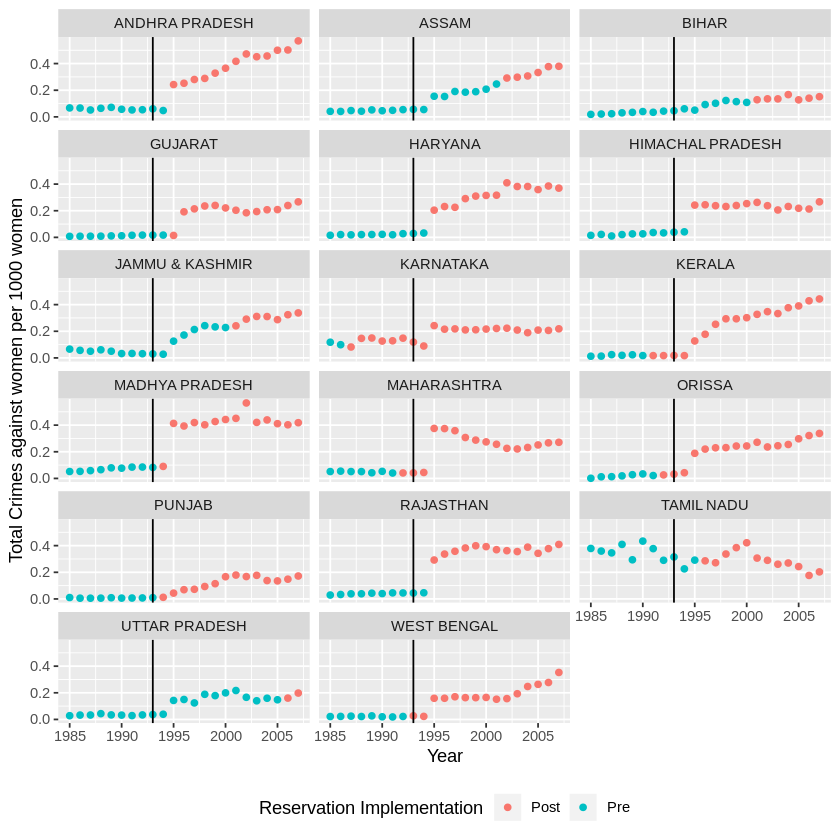

In [ ]:
#install.packages('ggplot2')
require('ggplot2')

############
# Figure 2 #
############

data$res<-"Post"
data$res[data$postwres==0]<-"Pre"

p<-ggplot(data, aes(y=pcr_womtot, x=year, group=newstateid, colour = factor(res))) + 
  geom_point() +facet_wrap( ~ newstateid, ncol = 3) +geom_vline(xintercept = 1993) +
  xlab("Year")+ ylab("Total Crimes against women per 1000 women") +  
  scale_colour_discrete(name = "Reservation Implementation")+theme(legend.position="bottom")

print(p)

### Table

In [ ]:
# these two packages are necessary to run the next lines of code

install.packages("sandwich")
library(sandwich)

install.packages("lmtest")
library(lmtest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [ ]:
# define clustered standard errors function
cl <- function(dat,fm, cluster) {
  require(sandwich, quietly = TRUE)
  require(lmtest, quietly = TRUE)
  M <- length(unique(cluster))
  N <- length(cluster)
  K <- fm$rank
  dfc <- (M/(M-1))*((N-1)/(N-K))
  uj  <- apply(estfun(fm),2, function(x) tapply(x, cluster, sum))
  vcovCL <- dfc*sandwich(fm, meat=crossprod(uj)/N)
  return(list(coeftest(fm, vcovCL), n=round(length(fm$fitted.values),0), rsq=round(summary(fm)$r.squared,2)))
}

In [ ]:
##################################################################
##TABLE 1
#Analysis of the data in Iyer et al. on and after 1995 in states where the reservation policy was implemented in 1995 and after

#Subsetting data to years post-1994 and reservation post-1994
better.data <- data[which(data$year.res>=1995),]
better.data <- data[which(better.data$year>=1995),]
# View(better.data)
head(better.data)

,X,year,stateuni,ipop,imale,pcr_prop,pcr_order,pcr_econ,pmurder,pcr_womtot,⋯,lparrest_womgirl,lparrest_nonwomen,lparrest_kidmen,lpmurder_m,lpmurder_f,newstateid,year.res,treat,state,res
,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<dbl>,<chr>
11,11,1995,ANDHRA PRADESH,70388808,35645714,0.3257336,0.08722978,0.04314606,0.03511922,0.2424079,⋯,-4.740167,-4.340173,-4.385282,NA,NA,ANDHRA PRADESH,1995,1,1,Post
12,12,1996,ANDHRA PRADESH,71359008,36125997,0.3057217,0.07088103,0.04721198,0.03656161,0.2523769,⋯,-4.060709,-4.282272,-4.906383,NA,NA,ANDHRA PRADESH,1995,1,1,Post
13,13,1997,ANDHRA PRADESH,72329207,36606280,0.3230230,0.06644619,0.06015550,0.03970733,0.2805201,⋯,-4.418194,-4.405653,-4.719733,NA,NA,ANDHRA PRADESH,1995,1,1,Post
14,14,1998,ANDHRA PRADESH,73299407,37086563,0.3350914,0.07862274,0.06476178,0.04054603,0.2887097,⋯,-4.553323,-5.081213,-4.785575,NA,NA,ANDHRA PRADESH,1995,1,1,Post
15,15,1999,ANDHRA PRADESH,74269607,37566847,0.3073532,0.05264603,0.07184635,0.03650214,0.3282587,⋯,-4.375981,-4.902295,-4.361103,-2.87896,-3.994414,ANDHRA PRADESH,1995,1,1,Post
16,16,2000,ANDHRA PRADESH,75239807,38047130,0.3260641,0.04444456,0.07518627,0.03593842,0.3652063,⋯,-4.536352,-4.708059,-4.693194,NA,NA,ANDHRA PRADESH,1995,1,1,Post


In [ ]:
#Running the initial model with post-1995 data, column 1
better.data$newstateid<-as.character(better.data$stateid)
new.column1<-lm(better.data$lpcr_womtot ~ better.data$postwres + factor(better.data$year) + factor(better.data$newstateid), subset=(better.data$majstate==1))
summary(new.column1)



Call:
lm(formula = better.data$lpcr_womtot ~ better.data$postwres + 
    factor(better.data$year) + factor(better.data$newstateid), 
    subset = (better.data$majstate == 1))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.91519 -0.08505  0.00088  0.10176  0.69992 

Coefficients:
                                               Estimate Std. Error t value
(Intercept)                                    -1.75246    0.13425 -13.054
better.data$postwres                            0.20821    0.09751   2.135
factor(better.data$year)1996                    0.38270    0.11513   3.324
factor(better.data$year)1997                    0.49516    0.11513   4.301
factor(better.data$year)1998                    0.56664    0.11513   4.922
factor(better.data$year)1999                    0.58801    0.11513   5.107
factor(better.data$year)2000                    0.60838    0.11513   5.284
factor(better.data$year)2001                    0.62751    0.11677   5.374
factor(better.data$year)2002  

In [ ]:
column1.cl<- cl(better.data, new.column1, better.data$newstateid)
column1.cl

[[1]]

t test of coefficients:

                                                  Estimate  Std. Error
(Intercept)                                    -1.7525e+00  2.1831e-01
better.data$postwres                            2.0821e-01  1.1064e-01
factor(better.data$year)1996                    3.8270e-01  2.7883e-01
factor(better.data$year)1997                    4.9516e-01  2.8622e-01
factor(better.data$year)1998                    5.6664e-01  2.9932e-01
factor(better.data$year)1999                    5.8801e-01  2.9469e-01
factor(better.data$year)2000                    6.0838e-01  2.8010e-01
factor(better.data$year)2001                    6.2751e-01  2.8098e-01
factor(better.data$year)2002                    6.9596e-01  2.7692e-01
factor(better.data$year)2003                    6.4287e-01  2.9687e-01
factor(better.data$year)2004                    6.9375e-01  3.0588e-01
factor(better.data$year)2005                    6.7132e-01  3.0401e-01
factor(better.data$year)2006                 

In [ ]:
#Running the initial model with post-1995 data, column 6
better.data$newstateid<-as.character(better.data$stateid)
new.total.crimes<-lm(better.data$lpcr_womtot ~ better.data$postwres + better.data$newstateid:better.data$year + better.data$pfemale + better.data$prural + better.data$plit + better.data$pfarm + better.data$womancm + better.data$pcgsdp + better.data$ppol_strengt +
              factor(better.data$year) + factor(better.data$newstateid), subset=(better.data$year>=1985 & better.data$majstate==1))
summary(new.total.crimes)


Call:
lm(formula = better.data$lpcr_womtot ~ better.data$postwres + 
    better.data$newstateid:better.data$year + better.data$pfemale + 
    better.data$prural + better.data$plit + better.data$pfarm + 
    better.data$womancm + better.data$pcgsdp + better.data$ppol_strengt + 
    factor(better.data$year) + factor(better.data$newstateid), 
    subset = (better.data$year >= 1985 & better.data$majstate == 
        1))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.05213 -0.09026 -0.00074  0.07835  0.65888 

Coefficients: (1 not defined because of singularities)
                                                          Estimate Std. Error
(Intercept)                                             1402.59546  394.19170
better.data$postwres                                      -0.04511    0.16137
better.data$pfemale                                     -925.37030  199.53770
better.data$prural                                      -103.07092   91.62905
better.data$plit             

In [ ]:
column2.cl<- cl(better.data, new.total.crimes, better.data$newstateid)
column2.cl

[[1]]

t test of coefficients:

                                                           Estimate  Std. Error
(Intercept)                                             1402.595459  878.371843
better.data$postwres                                      -0.045107    0.109138
better.data$pfemale                                     -925.370299  483.936102
better.data$prural                                      -103.070923  191.481139
better.data$plit                                        -154.680564   87.696643
better.data$pfarm                                       -368.734630  250.140219
better.data$womancm                                        0.103807    0.119418
better.data$pcgsdp                                         1.089607    1.016926
better.data$ppol_strengt                                  -0.022301    0.079896
factor(better.data$year)1996                               0.783919    0.841481
factor(better.data$year)1997                               1.362176    1.619231
factor(b

In [ ]:
#Table 3 column 1 code for total crimes against women in Iyer
model1w<-lm(data$lpcr_womtot ~ data$postwres +  
              factor(data$year) + factor(data$newstateid), subset=(data$year>=1985 & data$majstate==1))
summary(model1w)


Call:
lm(formula = data$lpcr_womtot ~ data$postwres + factor(data$year) + 
    factor(data$newstateid), subset = (data$year >= 1985 & data$majstate == 
    1))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.82621 -0.21707  0.00651  0.25783  1.56950 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                             -3.14521    0.15331 -20.515  < 2e-16
data$postwres                            0.36511    0.09573   3.814 0.000162
factor(data$year)1986                    0.15913    0.16649   0.956 0.339817
factor(data$year)1987                    0.12377    0.16658   0.743 0.457995
factor(data$year)1988                    0.27887    0.16658   1.674 0.095012
factor(data$year)1989                    0.36170    0.16658   2.171 0.030579
factor(data$year)1990                    0.30469    0.16658   1.829 0.068237
factor(data$year)1991                    0.25821    0.16687   1.547 0.122674
factor(data$year)1992      

In [ ]:
model1cw<- cl(data, model1w, data$newstateid)
model1cw

[[1]]

t test of coefficients:

                                           Estimate  Std. Error     t value
(Intercept)                             -3.1452e+00  2.3829e-01 -1.3199e+01
data$postwres                            3.6511e-01  1.9031e-01  1.9185e+00
factor(data$year)1986                    1.5913e-01  1.5517e-01  1.0255e+00
factor(data$year)1987                    1.2377e-01  1.7864e-01  6.9280e-01
factor(data$year)1988                    2.7887e-01  1.8055e-01  1.5446e+00
factor(data$year)1989                    3.6170e-01  2.0170e-01  1.7933e+00
factor(data$year)1990                    3.0469e-01  2.2600e-01  1.3482e+00
factor(data$year)1991                    2.5821e-01  2.0731e-01  1.2455e+00
factor(data$year)1992                    2.8438e-01  2.0276e-01  1.4026e+00
factor(data$year)1993                    3.2019e-01  2.1805e-01  1.4684e+00
factor(data$year)1994                    2.7934e-01  2.5292e-01  1.1045e+00
factor(data$year)1995                    1.4761e+00  3.0

In [ ]:
# Table 3 column 6 code for total crimes against women in Iyer
model6w<-lm(data$lpcr_womtot ~ data$postwres + data$newstateid:data$year + data$pfemale + data$prural + data$plit + data$pfarm + data$womancm + data$pcgsdp + data$ppol_strengt +
              factor(data$year) + factor(data$newstateid), subset=(data$year>=1985 & data$majstate==1))
summary(model6w)


Call:
lm(formula = data$lpcr_womtot ~ data$postwres + data$newstateid:data$year + 
    data$pfemale + data$prural + data$plit + data$pfarm + data$womancm + 
    data$pcgsdp + data$ppol_strengt + factor(data$year) + factor(data$newstateid), 
    subset = (data$year >= 1985 & data$majstate == 1))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.87459 -0.11660 -0.00157  0.12497  0.70362 

Coefficients: (1 not defined because of singularities)
                                            Estimate Std. Error t value
(Intercept)                               -1.815e+01  5.308e+01  -0.342
data$postwres                              2.288e-01  6.158e-02   3.716
data$pfemale                              -2.046e+01  1.045e+01  -1.958
data$prural                                1.184e+01  4.436e+00   2.668
data$plit                                 -2.896e+00  3.615e+00  -0.801
data$pfarm                                 1.615e+01  6.929e+00   2.331
data$womancm                           

In [ ]:
model6cw<- cl(data, model6w, data$newstateid)
model6cw

[[1]]

t test of coefficients:

                                             Estimate  Std. Error t value
(Intercept)                               -1.8151e+01  9.9215e+01 -0.1829
data$postwres                              2.2885e-01  8.4441e-02  2.7102
data$pfemale                              -2.0461e+01  1.8347e+01 -1.1153
data$prural                                1.1835e+01  7.0727e+00  1.6734
data$plit                                 -2.8955e+00  5.1406e+00 -0.5633
data$pfarm                                 1.6149e+01  1.3363e+01  1.2085
data$womancm                              -6.4402e-02  7.0851e-02 -0.9090
data$pcgsdp                               -1.8927e-01  1.0245e-01 -1.8474
data$ppol_strengt                         -9.1816e-02  5.3947e-02 -1.7020
factor(data$year)1986                      2.0723e-01  1.5085e-01  1.3737
factor(data$year)1987                      2.4650e-01  1.8910e-01  1.3036
factor(data$year)1988                      4.4976e-01  1.9259e-01  2.3352
factor

In [ ]:
# Outputting the results from the model restricted to post-1995
table2.1<-as.matrix(c(round(column1.cl[[1]]["better.data$postwres",1],3),paste("[",round(column1.cl[[1]]["better.data$postwres",2],3),"]"),round(column1.cl[[3]],2), round(column1.cl[[2]],0) ))
table2.2<-as.matrix(c(round(column2.cl[[1]]["better.data$postwres",1],3),paste("[",round(column2.cl[[1]]["better.data$postwres",2],3),"]"),round(column2.cl[[3]],2), round(column2.cl[[2]],0) ))
table2.3<-as.matrix(c(round(model1cw[[1]]["data$postwres",1],3),paste("[",round(model1cw[[1]]["data$postwres",2],3),"]"),round(model1cw[[3]],2), round(model1cw[[2]],0) ))
table2.4<-as.matrix(c(round(model6cw[[1]]["data$postwres",1],3),paste("[",round(model6cw[[1]]["data$postwres",2],3),"]"),round(model6cw[[3]],2), round(model6cw[[2]],0) ))

In [ ]:
table2_out <- matrix(NA,nrow=8,ncol=2)
table2_out[1:4,1] <- table2.1
table2_out[1:4,2] <- table2.2
table2_out[5:8,1] <- table2.3
table2_out[5:8,2] <- table2.4

In [ ]:
colnames(table2_out) <- c("No controls (1)", "Control for state-specific time trends + other controls (2)")
rownames(table2_out)<- c("Total crimes against women per 1,000 women", "", "R2", "Observations",
                         "Total crimes against women per 1,000 women", "", "R2", "Observations")

(table2_out)


,No controls (1),Control for state-specific time trends + other controls (2)
"Total crimes against women per 1,000 women",0.208,-0.045
,[ 0.111 ],[ 0.109 ]
R2,0.76,0.88
Observations,130,130
"Total crimes against women per 1,000 women",0.365,0.229
,[ 0.19 ],[ 0.084 ]
R2,0.85,0.95
Observations,391,391


In [ ]:
install.packages('stargazer')
library(stargazer)
stargazer(table2_out,title="Women's Political Representation and Crimes against Women")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




% Table created by stargazer v.5.2.2 by Marek Hlavac, Harvard University. E-mail: hlavac at fas.harvard.edu
% Date and time: Fri, Dec 20, 2019 - 06:27:25 AM
\begin{table}[!htbp] \centering 
  \caption{Women's Political Representation and Crimes against Women} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}} ccc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & No controls (1) & Control for state-specific time trends + other controls (2) \\ 
\hline \\[-1.8ex] 
Total.crimes.against.women.per.1.000.women & 0.208 & -0.045 \\ 
X & [ 0.111 ] & [ 0.109 ] \\ 
R2 & 0.76 & 0.88 \\ 
Observations & 130 & 130 \\ 
Total.crimes.against.women.per.1.000.women.1 & 0.365 & 0.229 \\ 
X.1 & [ 0.19 ] & [ 0.084 ] \\ 
R2.1 & 0.85 & 0.95 \\ 
Observations.1 & 391 & 391 \\ 
\hline \\[-1.8ex] 
\end{tabular} 
\end{table} 


**Table 2:**

I copy paste the above latex code to a latex editor and copy the picture to the github and add the link here.

![Table 2](https://github.com/mahmud-nobe/CS112-Final-Project/raw/master/table%202.PNG)

**Table 2.2:**

Disregarding Panel A, this is the replication of the table from original paper:

![Table 2](https://github.com/mahmud-nobe/CS112-Final-Project/raw/master/table%202.2.PNG)

## GenMatch 

In [ ]:
# installing library for genmatch
install.packages('Matching')
install.packages('rgenoud')


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(Matching)

In [ ]:
attach(after.data)
X = cbind(state, pcgsdp, pfemale, plit, pwlit, prural)
X.all = cbind(state, pcgsdp, pfemale, plit, pwlit, prural, state^2, pcgsdp^2, pfemale^2, plit^2, pwlit^2, prural^2, 
          state*pcgsdp, state*pfemale, state*plit, state*pwlit, state*prural,
          pcgsdp*pfemale, pcgsdp*plit, pcgsdp*pwlit, pcgsdp*prural,
          pfemale*plit, pfemale*pwlit, pfemale*prural, plit*pwlit, plit*prural, pwlit*prural)
Tr = treat
Y = pcr_womtot
detach(after.data)

The following object is masked _by_ .GlobalEnv:

    X




In [ ]:
genout = GenMatch(Tr = Tr, X = X, M=1, pop.size = 250,
                  max.generations = 20, wait.generations = 25,
                  exact = c(T, F, F, F, F, F))
mout = Match(Tr = Tr, X = X, M=1, Weight.matrix = genout,
                  exact = c(T, F, F, F, F, F))
summary(mout)
mb <- MatchBalance(treat ~ state + pcgsdp + pfemale + plit + pwlit + prural, data=after.data, match.out=mout, nboots=500)



Fri Dec 20 10:15:31 2019
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+03 
 0.000000e+00   <=  X2   <=    1.000000e+03 
 0.000000e+00   <=  X3   <=    1.000000e+03 
 0.000000e+00   <=  X4   <=    1.000000e+03 
 0.000000e+00   <=  X5   <=    1.000000e+03 
 0.000000e+00   <=  X6   <=    1.000000e+03 

Data Type: Floating Point
Operators (code number, name, population) 
	(1) Cloning........................... 	30
	(2) Uniform Mutation.................. 	31
	(3) Boundary Mutation................. 	31
	(4) Non-Uniform Mutation.............. 	31
	(5) Polytope Crossover................ 	31
	(6) Simple Crossover.................. 	32
	(7) Whole Non-Uniform Mutation........ 	31
	(8) Heuristic Crossover............... 	32
	(9) Local-Minimum Crossover........... 	0

SOFT Maximum Number of Generations: 20
Maximum Nonchanging Generations: 25
Population size       : 250
Convergence Tolerance: 1.000000e-03

Not Using the BFGS Derivative Based Optimizer on the Best Individual Each Generation.
No

In [ ]:
attach(before.data)
X = cbind(state, pcgsdp, pfemale, plit, pwlit, prural)
X.all = cbind(state, pcgsdp, pfemale, plit, pwlit, prural, state^2, pcgsdp^2, pfemale^2, plit^2, pwlit^2, prural^2, 
          state*pcgsdp, state*pfemale, state*plit, state*pwlit, state*prural,
          pcgsdp*pfemale, pcgsdp*plit, pcgsdp*pwlit, pcgsdp*prural,
          pfemale*plit, pfemale*pwlit, pfemale*prural, plit*pwlit, plit*prural, pwlit*prural)
Tr = treat
Y = pcr_womtot
detach(before.data)

The following object is masked _by_ .GlobalEnv:

    X




In [ ]:
genout = GenMatch(Tr = Tr, X = X, M=1, pop.size = 250,
                  max.generations = 20, wait.generations = 25,
                  exact = c(T, F, F, F, F, F))
mout = Match(Tr = Tr, X = X, M=1, Weight.matrix = genout,
                  exact = c(T, F, F, F, F, F))
summary(mout)
mb <- MatchBalance(treat ~ state + pcgsdp + pfemale + plit + pwlit + prural, data=before.data, match.out=mout, nboots=500)



Fri Dec 20 10:15:55 2019
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+03 
 0.000000e+00   <=  X2   <=    1.000000e+03 
 0.000000e+00   <=  X3   <=    1.000000e+03 
 0.000000e+00   <=  X4   <=    1.000000e+03 
 0.000000e+00   <=  X5   <=    1.000000e+03 
 0.000000e+00   <=  X6   <=    1.000000e+03 

Data Type: Floating Point
Operators (code number, name, population) 
	(1) Cloning........................... 	30
	(2) Uniform Mutation.................. 	31
	(3) Boundary Mutation................. 	31
	(4) Non-Uniform Mutation.............. 	31
	(5) Polytope Crossover................ 	31
	(6) Simple Crossover.................. 	32
	(7) Whole Non-Uniform Mutation........ 	31
	(8) Heuristic Crossover............... 	32
	(9) Local-Minimum Crossover........... 	0

SOFT Maximum Number of Generations: 20
Maximum Nonchanging Generations: 25
Population size       : 250
Convergence Tolerance: 1.000000e-03

Not Using the BFGS Derivative Based Optimizer on the Best Individual Each Generation.
No

In [ ]:
attach(after.data)
X = cbind(state, pcgsdp, pfemale, plit, pwlit, prural)
X.all = cbind(state, pcgsdp, pfemale, plit, pwlit, prural, state^2, pcgsdp^2, pfemale^2, plit^2, pwlit^2, prural^2, 
          state*pcgsdp, state*pfemale, state*plit, state*pwlit, state*prural,
          pcgsdp*pfemale, pcgsdp*plit, pcgsdp*pwlit, pcgsdp*prural,
          pfemale*plit, pfemale*pwlit, pfemale*prural, plit*pwlit, plit*prural, pwlit*prural)
Tr = treat
Y = pcr_womtot
detach(after.data)

The following object is masked _by_ .GlobalEnv:

    X




In [ ]:
genout = GenMatch(Tr = Tr, X = X.all, M=1, pop.size = 250,
                  max.generations = 20, wait.generations = 25)



Fri Dec 20 10:16:20 2019
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+03 
 0.000000e+00   <=  X2   <=    1.000000e+03 
 0.000000e+00   <=  X3   <=    1.000000e+03 
 0.000000e+00   <=  X4   <=    1.000000e+03 
 0.000000e+00   <=  X5   <=    1.000000e+03 
 0.000000e+00   <=  X6   <=    1.000000e+03 
 0.000000e+00   <=  X7   <=    1.000000e+03 
 0.000000e+00   <=  X8   <=    1.000000e+03 
 0.000000e+00   <=  X9   <=    1.000000e+03 
 0.000000e+00   <=  X10  <=    1.000000e+03 
 0.000000e+00   <=  X11  <=    1.000000e+03 
 0.000000e+00   <=  X12  <=    1.000000e+03 
 0.000000e+00   <=  X13  <=    1.000000e+03 
 0.000000e+00   <=  X14  <=    1.000000e+03 
 0.000000e+00   <=  X15  <=    1.000000e+03 
 0.000000e+00   <=  X16  <=    1.000000e+03 
 0.000000e+00   <=  X17  <=    1.000000e+03 
 0.000000e+00   <=  X18  <=    1.000000e+03 
 0.000000e+00   <=  X19  <=    1.000000e+03 
 0.000000e+00   <=  X20  <=    1.000000e+03 
 0.000000e+00   <=  X21  <=    1.000000e+03 
 0.000000e+00   <= 

In [ ]:
mout = Match(Tr = Tr, X = X.all, M=1, Weight.matrix = genout)

In [ ]:
summary(mout)


Estimate...  0 
SE.........  0 
T-stat.....  NaN 
p.val......  NA 

Original number of observations..............  130 
Original number of treated obs...............  99 
Matched number of observations...............  99 
Matched number of observations  (unweighted).  99 



In [ ]:
mb <- MatchBalance(after.data$treat ~ after.data$state + after.data$pcgsdp + after.data$pfemale + after.data$plit + after.data$pwlit + after.data$prural, match.out=mout, nboots=500)


***** (V1) after.data$state *****
                       Before Matching 	 	 After Matching
mean treatment........     6.9091 	 	     6.9091 
mean control..........     8.5484 	 	     9.6566 
std mean diff.........    -32.599 	 	    -54.636 

mean raw eQQ diff.....     2.1613 	 	     2.7475 
med  raw eQQ diff.....          1 	 	          1 
max  raw eQQ diff.....          9 	 	          9 

mean eCDF diff........    0.13851 	 	    0.15354 
med  eCDF diff........    0.12284 	 	    0.13131 
max  eCDF diff........    0.33464 	 	    0.39394 

var ratio (Tr/Co).....    0.65871 	 	    0.80819 
T-test p-value........    0.18686 	 	 2.3504e-05 
KS Bootstrap p-value..      0.002 	 	 < 2.22e-16 
KS Naive p-value......   0.010111 	 	 4.2529e-07 
KS Statistic..........    0.33464 	 	    0.39394 


***** (V2) after.data$pcgsdp *****
                       Before Matching 	 	 After Matching
mean treatment........     2.1787 	 	     2.1787 
mean control..........      1.164 	 	     1.5901 
std mean 

In [ ]:
mout = Match(Y=Y, Tr = Tr, X = X.all, M=1, Weight.matrix = genout)
summary(mout)


Estimate...  0.054215 
AI SE......  0.03617 
T-stat.....  1.4989 
p.val......  0.1339 

Original number of observations..............  130 
Original number of treated obs...............  99 
Matched number of observations...............  99 
Matched number of observations  (unweighted).  99 



In [ ]:
attach(before.data)
X = cbind(state, pcgsdp, pfemale, plit, pwlit, prural)
X.all = cbind(state, pcgsdp, pfemale, plit, pwlit, prural, state^2, pcgsdp^2, pfemale^2, plit^2, pwlit^2, prural^2, 
          state*pcgsdp, state*pfemale, state*plit, state*pwlit, state*prural,
          pcgsdp*pfemale, pcgsdp*plit, pcgsdp*pwlit, pcgsdp*prural,
          pfemale*plit, pfemale*pwlit, pfemale*prural, plit*pwlit, plit*prural, pwlit*prural)
Tr = treat
Y = pcr_womtot
detach(before.data)

The following object is masked _by_ .GlobalEnv:

    X




In [ ]:
genout = GenMatch(Tr = Tr, X = X.all, M=1, pop.size = 250,
                  max.generations = 20, wait.generations = 25)



Fri Dec 20 10:20:43 2019
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+03 
 0.000000e+00   <=  X2   <=    1.000000e+03 
 0.000000e+00   <=  X3   <=    1.000000e+03 
 0.000000e+00   <=  X4   <=    1.000000e+03 
 0.000000e+00   <=  X5   <=    1.000000e+03 
 0.000000e+00   <=  X6   <=    1.000000e+03 
 0.000000e+00   <=  X7   <=    1.000000e+03 
 0.000000e+00   <=  X8   <=    1.000000e+03 
 0.000000e+00   <=  X9   <=    1.000000e+03 
 0.000000e+00   <=  X10  <=    1.000000e+03 
 0.000000e+00   <=  X11  <=    1.000000e+03 
 0.000000e+00   <=  X12  <=    1.000000e+03 
 0.000000e+00   <=  X13  <=    1.000000e+03 
 0.000000e+00   <=  X14  <=    1.000000e+03 
 0.000000e+00   <=  X15  <=    1.000000e+03 
 0.000000e+00   <=  X16  <=    1.000000e+03 
 0.000000e+00   <=  X17  <=    1.000000e+03 
 0.000000e+00   <=  X18  <=    1.000000e+03 
 0.000000e+00   <=  X19  <=    1.000000e+03 
 0.000000e+00   <=  X20  <=    1.000000e+03 
 0.000000e+00   <=  X21  <=    1.000000e+03 
 0.000000e+00   <= 

In [ ]:
mout = Match(Tr = Tr, X = X.all, M=1, Weight.matrix = genout)

In [ ]:
mb <- MatchBalance(treat ~ state + pcgsdp + pfemale + plit + pwlit + prural, data=before.data, match.out=mout, nboots=500)


***** (V1) state *****
                       Before Matching 	 	 After Matching
mean treatment........     10.273 	 	     10.273 
mean control..........     11.958 	 	         11 
std mean diff.........    -61.773 	 	    -26.653 

mean raw eQQ diff.....     1.7273 	 	     1.0909 
med  raw eQQ diff.....          2 	 	          1 
max  raw eQQ diff.....          5 	 	          4 

mean eCDF diff........    0.20833 	 	    0.13636 
med  eCDF diff........    0.22727 	 	    0.13636 
max  eCDF diff........    0.37879 	 	    0.22727 

var ratio (Tr/Co).....     1.0356 	 	     1.4478 
T-test p-value........   0.020505 	 	     0.1035 
KS Bootstrap p-value..      0.006 	 	      0.404 
KS Naive p-value......   0.026361 	 	    0.62081 
KS Statistic..........    0.37879 	 	    0.22727 


***** (V2) pcgsdp *****
                       Before Matching 	 	 After Matching
mean treatment........     1.3631 	 	     1.3631 
mean control..........     1.2199 	 	     1.4008 
std mean diff.........     29.0

In [ ]:
mout = Match(Y=Y, Tr = Tr, X = X.all, M=1, Weight.matrix = genout)
summary(mout)


Estimate...  0.022826 
AI SE......  0.00863 
T-stat.....  2.645 
p.val......  0.0081689 

Original number of observations..............  70 
Original number of treated obs...............  22 
Matched number of observations...............  22 
Matched number of observations  (unweighted).  22 



In [ ]:
conf.interval.95 <- function(mout){
  up = mout$est + 1.96*mout$se
  low = mout$est - 1.96*mout$se
  if (is.null(mout$se)){
    up = mout$est + 1.96*mout$se.standard
    low = mout$est - 1.96*mout$se.standard
  }
  return (paste("[",low,",",up,"]"))
}

conf.interval.95(mout)

[1] "[ 0.00591162084618084 , 0.0397411602901828 ]"

## Synthetic Control


In [ ]:
install.packages('Synth')
library(Synth)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘kernlab’, ‘optimx’


##
## Synth Package: Implements Synthetic Control Methods.


## See http://www.mit.edu/~jhainm/software.htm for additional information.





### ASSAM: Synthetic Control


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 0.0003042721 

solution.v:
 0.2300167 0.3700114 0.393585 0.006386841 0 

solution.w:
 0.05121218 0.2659888 0.03791813 0.05109935 0.02624605 0.07985753 0.04132484 0.05403987 0.03250165 0.03311749 0.03143242 0.08711503 0.03540303 0.02356482 0.06408271 0.0850961 



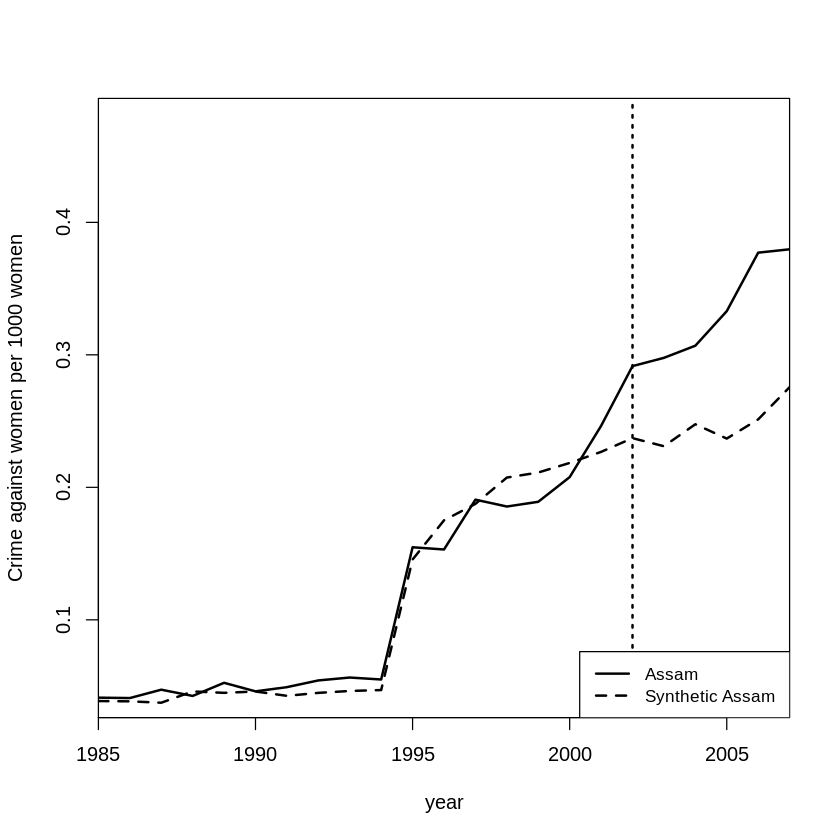

In [ ]:
# Mahmud: the changed that I made
# data$state <- as.numeric(as.factor(data$stateid))
# data$stateuni <- as.character(data$stateuni)
# unit.names.variable = c("stateuni")
# unit.variable = "state",

# treatment happened in 2002 in ASSAM

data = data

data$state <- as.numeric(as.factor(data$stateid))
data$stateuni <- as.character(data$stateuni)

dataprep.out = 
  dataprep(
    foo = data,
    predictors = c("pcgsdp", "pfemale", "plit","pwlit","prural"),
    predictors.op = "median", #match the median of the predictors
    time.predictors.prior = 1985:2002, # data used to train the synthetic control unit 
    dependent = "pcr_womtot",
    unit.variable = "state",
    time.variable = "year",
    #special.predictors = list(
    #  list("pcgsdp", seq(1985,2001,2),"mean"),
    #  list("pfemale", seq(1985,2001,2),"mean"),
    #  list("plit",  seq(1985,2001,2),"mean"),
    #  list("pwlit",  seq(1985,2001,2),"mean"),
    #  list("prural",  seq(1985,2001,2),"mean")
    #),
    treatment.identifier = 2, #point at Assam,
    controls.identifier = c(1, 3:17),
    time.optimize.ssr = c(1985:2002), #count the outcome variables of Assam and synthetic control units and make it as small as possible
    unit.names.variable = c("stateuni"),
    time.plot = c(1985:2007)
  )

synth.out = synth(dataprep.out) #create synthetic controls

#plot treatment vs synthetic control outcomes trend
path.plot(synth.res = synth.out, dataprep.res = dataprep.out,
          Ylab = "Crime against women per 1000 women", Xlab = 'year', tr.intake = 2002,
          Legend = c("Assam", "Synthetic Assam"), Legend.position = "bottomright")
# abline(v = 2001, lw=2)




In [ ]:
#gap or difference in treatment and synthetic control
gaps <- dataprep.out$Y1plot - (dataprep.out$Y0plot %*% synth.out$solution.w)

#pre built tables from synth objects
synth.tables <- synth.tab(dataprep.res = dataprep.out, synth.res = synth.out)

#comparing pre-treatment predictor values for the treated unit, the synthetic control unit , and all the units in the sample
synth.tables$tab.pred[1:5,]

#View control unit weights
synth.tables$tab.w



,Treated,Synthetic,Sample Mean
pcgsdp,1.324,1.324,1.495
pfemale,0.926,0.926,0.936
plit,0.453,0.454,0.490
pwlit,0.374,0.352,0.391
prural,0.884,0.771,0.745


,w.weights,unit.names,unit.numbers
,<dbl>,<fct>,<dbl>
1,0.051,ANDHRA PRADESH,1
3,0.266,BIHAR,3
4,0.038,GUJARAT,4
5,0.051,HARYANA,5
6,0.026,HIMACHAL PRADESH,6
7,0.080,JAMMU & KASHMIR,7
8,0.041,KARNATAKA,8
9,0.054,KERALA,9
10,0.033,MADHYA PRADESH,10


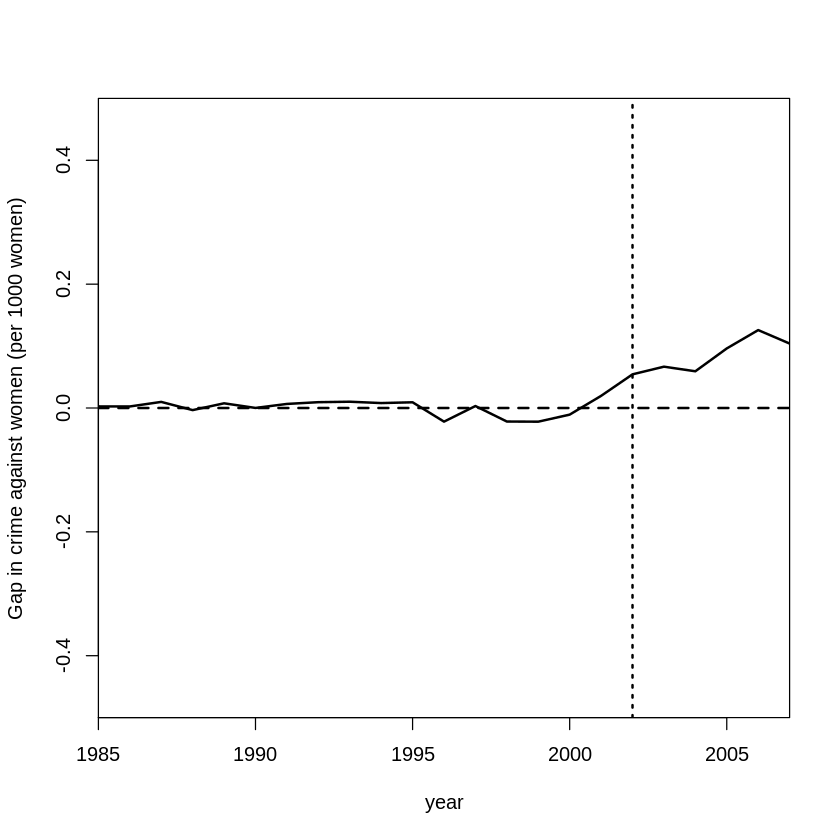

In [ ]:
gaps.plot(synth.res = synth.out,
           dataprep.res = dataprep.out,
           Ylab = "Gap in crime against women (per 1000 women)",
           Xlab = "year",
           Ylim = c(-.5,.5),
           Main = NA,
           tr.intake = 2002
           )


#### Placebo test in space for all 17 states

In [ ]:
### Placebo test in space

store <- matrix(NA, length(1985:2007), 17)
colnames(store) <- unique(data$stateuni)

for (k in 1:17){
  # print(k)
  dataprep.out = dataprep(
    foo = data,
    predictors = c("pcgsdp", "pfemale", "plit","pwlit","prural"),
    predictors.op = "median",
    time.predictors.prior = 1985:2002,
    dependent = "pcr_womtot",
    unit.variable = "state",
    time.variable = "year",
    #special.predictors = list(
    #  list("pcgsdp", seq(1985,2001,2),"mean"),
    #  list("pfemale", seq(1985,2001,2),"mean"),
    #  list("plit",  seq(1985,2001,2),"mean"),
    #  list("pwlit",  seq(1985,2001,2),"mean"),
    #  list("prural",  seq(1985,2001,2),"mean")
    #),
    treatment.identifier = k,
    controls.identifier = c(1:17)[-k],
    time.optimize.ssr = c(1985:2002),
    unit.names.variable = c("stateuni"),
    time.plot = c(1985:2007)
  )

  synth.out <- synth(
    data.prep.obj = dataprep.out,
    method = "BFGS"
  )

  # store gaps
  print(k)
  store[, k] <- dataprep.out$Y1plot - (dataprep.out$Y0plot %*% synth.out$solution.w)
}



X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 0.002281638 

solution.v:
 0.1687452 0.005238963 0.5157038 0.1318055 0.1785065 

solution.w:
 9.8121e-06 6e-10 0.000225708 6.73029e-05 7.4397e-06 1.97751e-05 0.25026 8.444e-07 3.4819e-06 0.0007777076 8.33e-06 0.05677168 0.6566102 0.03520986 2.866e-06 2.49876e-05 

[1] 1

X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 0.0003042721 

solution.v:
 0.2300167 0.3700114 0.393585 0.006386841 0 

solution.w:
 0.05121218 0.2659888 0.03791813 0.05109935 0.02624605 0.07985753 0.04132484 0.05403987 0.03250165 0.03311749 0.03143242 0.08711503 0.03540303 0.02356482 0.06408271 0.0850961 

[1] 2

X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 search

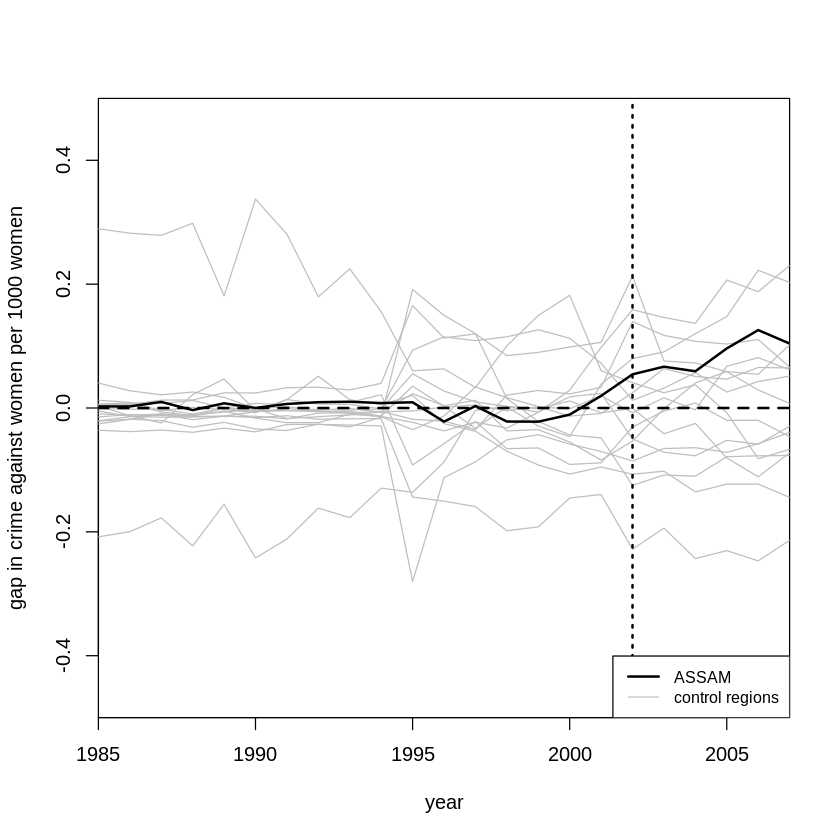

In [ ]:
# now the figure
rownames(store) <- 1985:2007

# set bounds in gaps data:
gap.start <- 1
gap.end <- nrow(store)
years <- 1985:2007
gap.end.pre <- which(rownames(store)=='2002')


# Plot
plot(c(1,2),c(1,2),
   ylim=c(-0.5,0.5),xlab="year",
   xlim=c(1985,2007),ylab="gap in crime against women per 1000 women",
   type="l",lwd=2,col="black",
   xaxs="i",yaxs="i")

# Add lines for control states
for (i in 1:ncol(store)) { lines(years,store[gap.start:gap.end,i],col="gray") }

## Add ASSAM Line
lines(years,store[gap.start:gap.end,which(colnames(store)=="ASSAM")],lwd=2,col="black")

# Add grid
abline(v=2002,lty="dotted",lwd=2)
abline(h=0,lty="dashed",lwd=2)
legend("bottomright",legend=c("ASSAM","control regions"),
       lty=c(1,1),col=c("black","gray"),lwd=c(2,1),cex=.8)

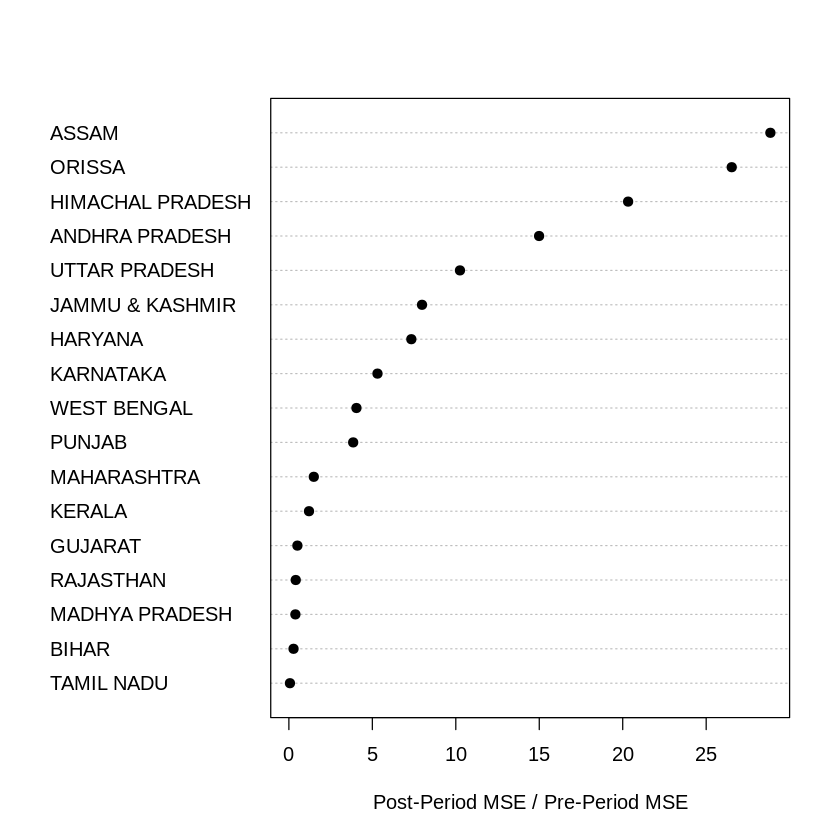

In [ ]:
# dot chart
mse <- function(x){mean(x^2)}
preloss <- apply(store[gap.start:gap.end.pre,],2,mse)
postloss <- apply(store[(gap.end.pre+1):gap.end,],2,mse)

#pdf("2ratio_post_to_preperiod_rmse2a.pdf")
dotchart(sort(postloss/preloss),
         xlab="Post-Period MSE / Pre-Period MSE",
         pch=19)

#### Discard the states whose pre treatment MSE is respectively 20 and 5 times larger than ASSAM pre treat MSE

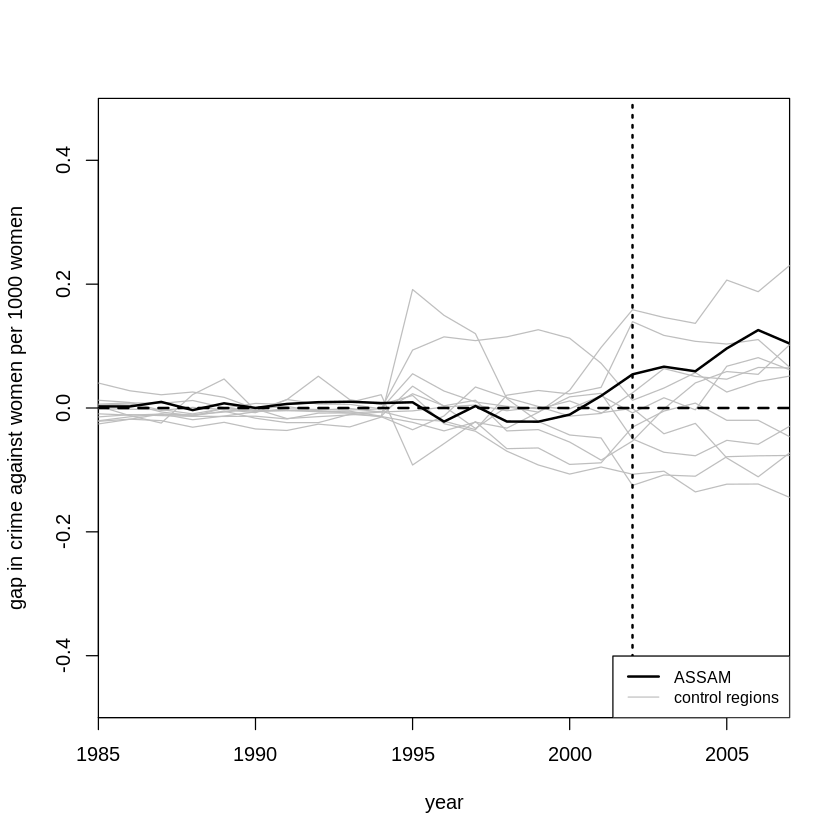

In [ ]:
# Taking out the states where pre treatment MSE is greater than (Assam pre-period MSE * 20)

store.2 = store[, preloss < 20*preloss['ASSAM']]

# Plot
plot(c(1,2),c(1,2),
   ylim=c(-0.5,0.5),xlab="year",
   xlim=c(1985,2007),ylab="gap in crime against women per 1000 women",
   type="l",lwd=2,col="black",
   xaxs="i",yaxs="i")

# Add lines for control states
for (i in 1:ncol(store.2)) { lines(years,store.2[gap.start:gap.end,i],col="gray") }

## Add ASSAM Line
lines(years,store.2[gap.start:gap.end,which(colnames(store.2)=="ASSAM")],lwd=2,col="black")

# Add grid
abline(v=2002,lty="dotted",lwd=2)
abline(h=0,lty="dashed",lwd=2)
legend("bottomright",legend=c("ASSAM","control regions"),
       lty=c(1,1),col=c("black","gray"),lwd=c(2,1),cex=.8)


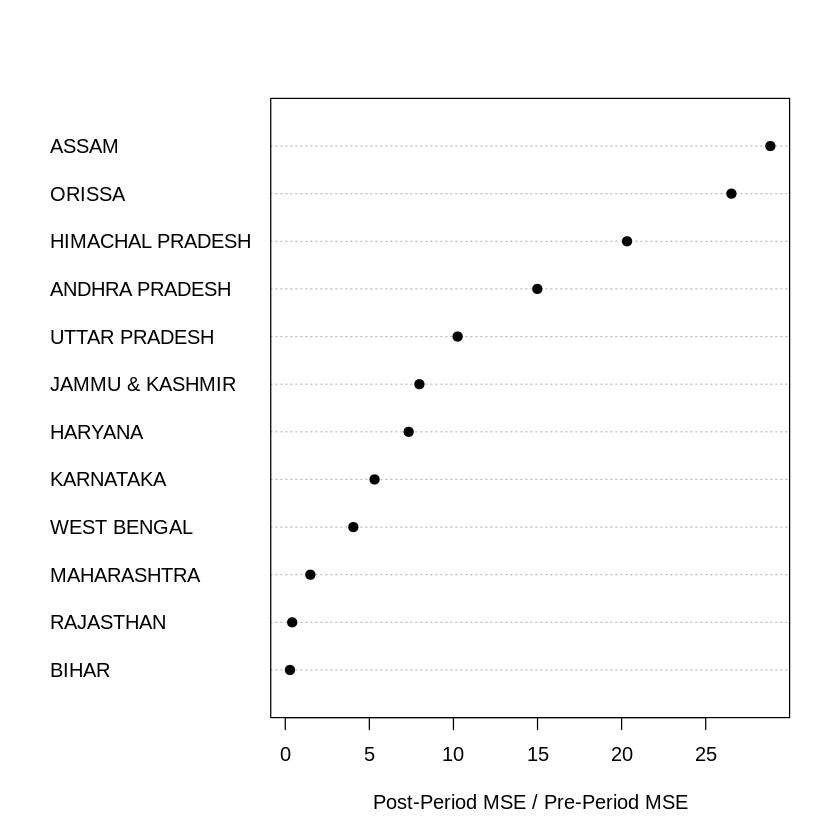

In [ ]:
# dot chart
mse <- function(x){mean(x^2)}
preloss.2 <- apply(store.2[gap.start:gap.end.pre,],2,mse)
postloss.2 <- apply(store.2[(gap.end.pre+1):gap.end,],2,mse)

names(preloss.2) = colnames(store.2)

#pdf("2ratio_post_to_preperiod_rmse2a.pdf")
dotchart(sort(postloss.2/preloss.2),
         xlab="Post-Period MSE / Pre-Period MSE",
         pch=19)

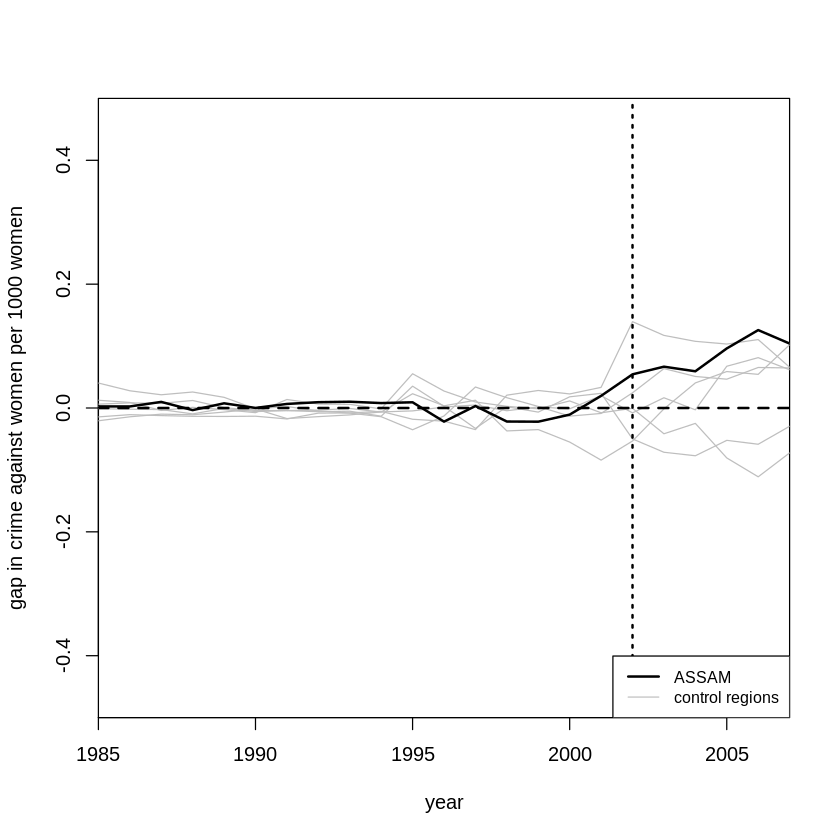

In [ ]:
# Taking out the states where pre treatment MSE is greater than (Assam pre-period MSE * 5)

store.3 = store[, preloss < 5*preloss['ASSAM']]

# Plot
plot(c(1,2),c(1,2),
   ylim=c(-0.5,0.5),xlab="year",
   xlim=c(1985,2007),ylab="gap in crime against women per 1000 women",
   type="l",lwd=2,col="black",
   xaxs="i",yaxs="i")

# Add lines for control states
for (i in 1:ncol(store.3)) { lines(years,store.3[gap.start:gap.end,i],col="gray") }

## Add ASSAM Line
lines(years,store.3[gap.start:gap.end,which(colnames(store.3)=="ASSAM")],lwd=2,col="black")

# Add grid
abline(v=2002,lty="dotted",lwd=2)
abline(h=0,lty="dashed",lwd=2)
legend("bottomright",legend=c("ASSAM","control regions"),
       lty=c(1,1),col=c("black","gray"),lwd=c(2,1),cex=.8)


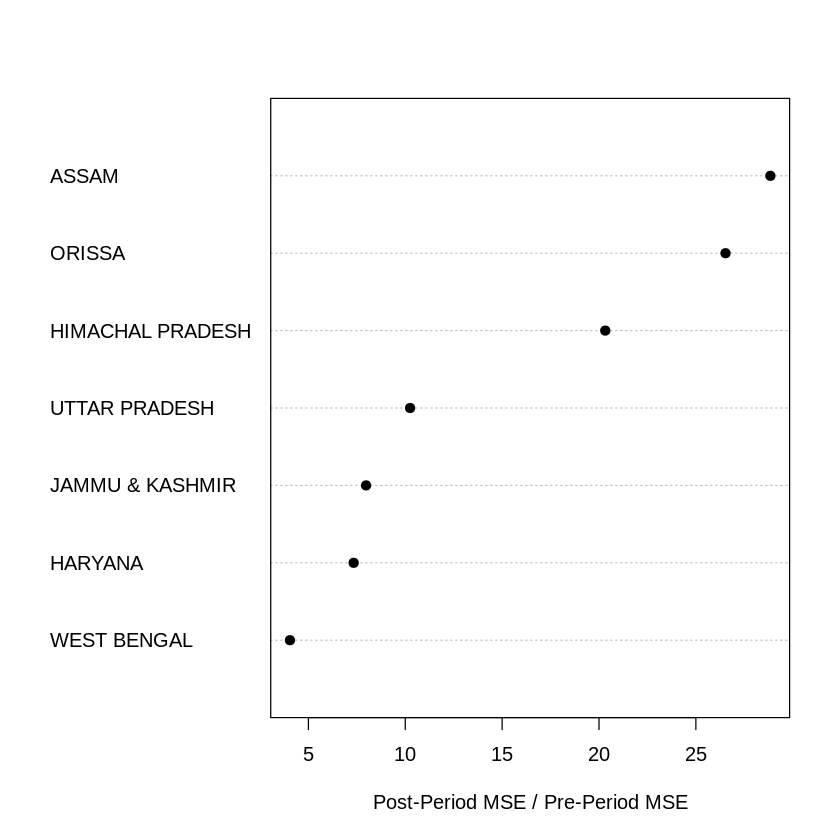

In [ ]:
# dot chart
mse <- function(x){mean(x^2)}
preloss.3 <- apply(store.3[gap.start:gap.end.pre,],2,mse)
postloss.3 <- apply(store.3[(gap.end.pre+1):gap.end,],2,mse)

names(preloss.3) = colnames(store.3)

#pdf("2ratio_post_to_preperiod_rmse2a.pdf")
dotchart(sort(postloss.3/preloss.3),
         xlab="Post-Period MSE / Pre-Period MSE",
         pch=19)

#### Placebo in time for 'fake' treatment in 1998 and 1992


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 0.0002812801 

solution.v:
 0.010772 8.38e-07 0.3485767 0.1670458 0.4736047 

solution.w:
 0.003727256 0.4663653 0.001293254 0.001872675 0.5064547 0.003208589 0.001643212 0.0007814532 0.002067115 0.001102013 0.0008822391 0.003425231 0.002217716 0.001194164 0.00205559 0.001709502 



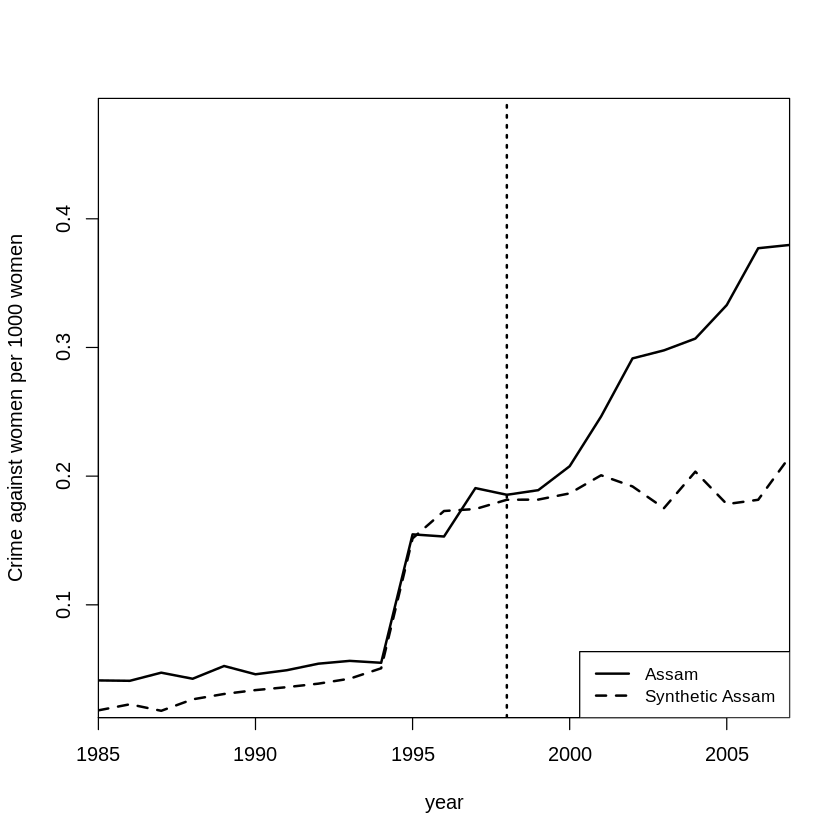

In [ ]:
## Placebo effect in time at 'fake' treatment = 1998  

dataprep.out = dataprep(
  foo = data,
  predictors = c("pcgsdp", "pfemale", "plit","pwlit","prural"),
  predictors.op = "median",
  time.predictors.prior = 1985:1998,
  dependent = "pcr_womtot",
  unit.variable = "state",
  time.variable = "year",
  #special.predictors = list(
  #  list("pcgsdp", seq(1985,k,2),"mean"),
  #  list("pfemale", seq(1985,k,2),"mean"),
  #  list("plit",  seq(1985,k,2),"mean"),
  #  list("pwlit",  seq(1985,k,2),"mean"),
  #  list("prural",  seq(1985,k,2),"mean")
  #),
  treatment.identifier = 2,
  controls.identifier = c(1, 3:17),
  time.optimize.ssr = c(1985:1998),
  unit.names.variable = c("stateuni"),
  time.plot = c(1985:2007)
)

synth.out <- synth(
  data.prep.obj = dataprep.out,
  method = "BFGS"
)

#plot treatment vs synthetic control outcomes trend
path.plot(synth.res = synth.out, dataprep.res = dataprep.out,
          Ylab = "Crime against women per 1000 women", Xlab = 'year', tr.intake = 1998,
          Legend = c("Assam", "Synthetic Assam"), Legend.position = "bottomright")


,Treated,Synthetic,Sample Mean
pcgsdp,1.295,1.186,1.372
pfemale,0.923,0.947,0.936
plit,0.430,0.438,0.469
pwlit,0.349,0.331,0.367
prural,0.888,0.887,0.750


,w.weights,unit.names,unit.numbers
,<dbl>,<fct>,<dbl>
1,0.004,ANDHRA PRADESH,1
3,0.466,BIHAR,3
4,0.001,GUJARAT,4
5,0.002,HARYANA,5
6,0.506,HIMACHAL PRADESH,6
7,0.003,JAMMU & KASHMIR,7
8,0.002,KARNATAKA,8
9,0.001,KERALA,9
10,0.002,MADHYA PRADESH,10


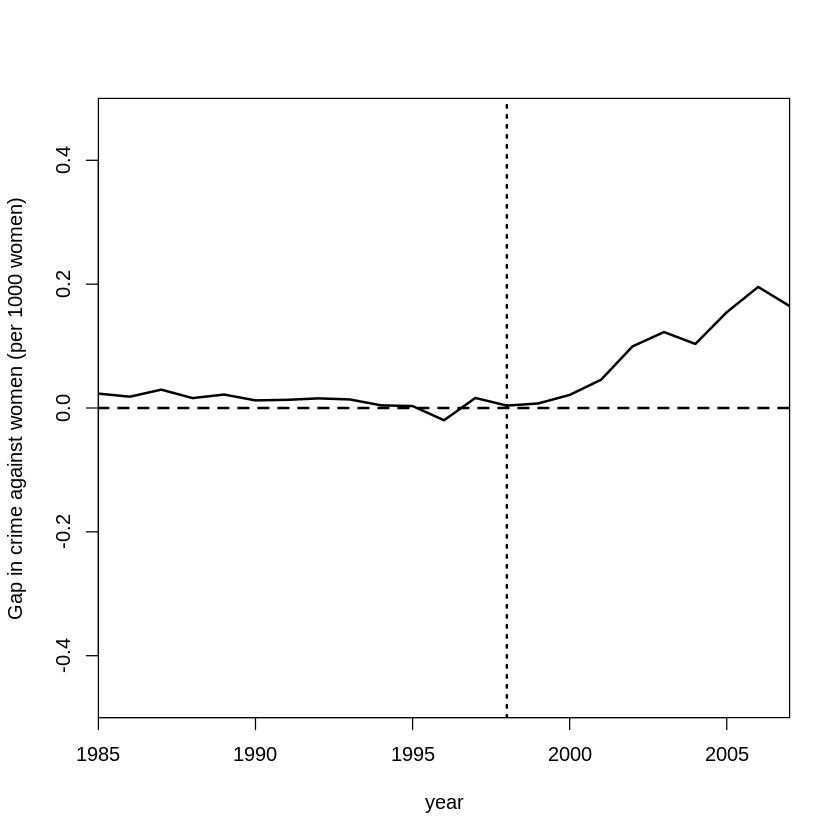

In [ ]:
#gap or difference in treatment and synthetic control
gaps <- dataprep.out$Y1plot - (dataprep.out$Y0plot %*% synth.out$solution.w)

#pre built tables from synth objects
synth.tables <- synth.tab(dataprep.res = dataprep.out, synth.res = synth.out)

#comparing pre-treatment predictor values for the treated unit, the synthetic control unit , and all the units in the sample
synth.tables$tab.pred[1:5,]

#View control unit weights
synth.tables$tab.w

gaps.plot(synth.res = synth.out,
           dataprep.res = dataprep.out,
           Ylab = "Gap in crime against women (per 1000 women)",
           Xlab = "year",
           Ylim = c(-.5,.5),
           Main = NA,
           tr.intake = 1998
           )


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 0.0003258889 

solution.v:
 0.0003749968 0.685861 0.2021482 0.0009821526 0.1106336 

solution.w:
 0.0001345309 6.91729e-05 0.0001929298 4.60742e-05 0.4463343 0.001208715 0.0001402082 3.05958e-05 0.0003702303 0.0001505258 0.0002355566 0.0009355249 0.0005685963 7.86877e-05 0.5490402 0.0004640967 



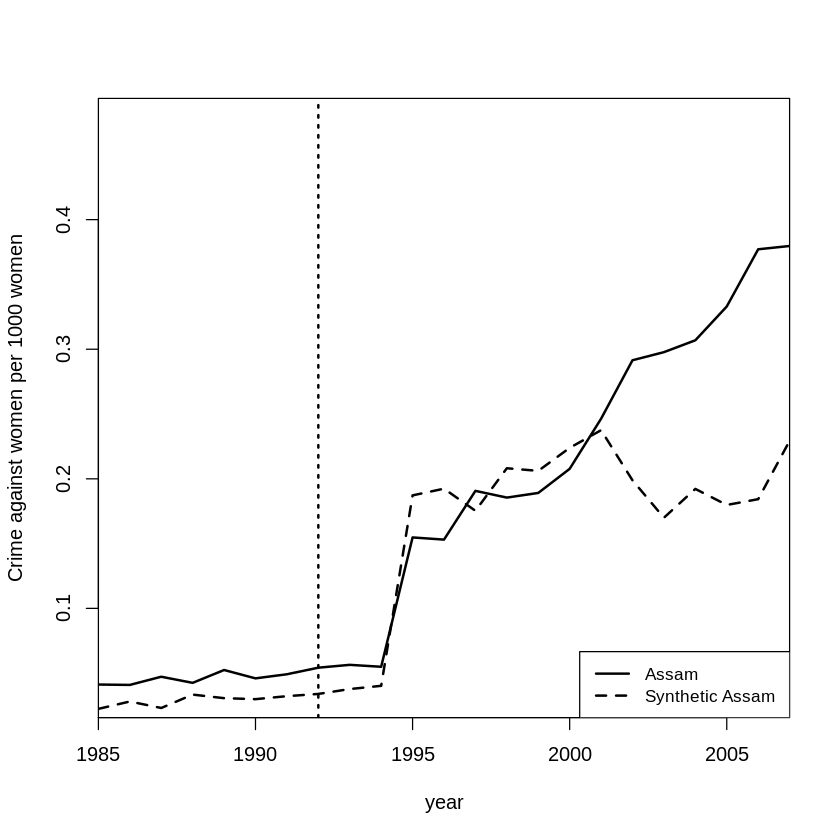

In [ ]:
## Placebo effect in time at 'fake' treatment = 1992  

dataprep.out = dataprep(
  foo = data,
  predictors = c("pcgsdp", "pfemale", "plit","pwlit","prural"),
  predictors.op = "median",
  time.predictors.prior = 1985:1992,
  dependent = "pcr_womtot",
  unit.variable = "state",
  time.variable = "year",
  #special.predictors = list(
  #  list("pcgsdp", seq(1985,k,2),"mean"),
  #  list("pfemale", seq(1985,k,2),"mean"),
  #  list("plit",  seq(1985,k,2),"mean"),
  #  list("pwlit",  seq(1985,k,2),"mean"),
  #  list("prural",  seq(1985,k,2),"mean")
  #),
  treatment.identifier = 2,
  controls.identifier = c(1, 3:17),
  time.optimize.ssr = c(1985:1992),
  unit.names.variable = c("stateuni"),
  time.plot = c(1985:2007)
)

synth.out <- synth(
  data.prep.obj = dataprep.out,
  method = "BFGS"
)

#plot treatment vs synthetic control outcomes trend
path.plot(synth.res = synth.out, dataprep.res = dataprep.out,
          Ylab = "Crime against women per 1000 women", Xlab = 'year', tr.intake = 1992,
          Legend = c("Assam", "Synthetic Assam"), Legend.position = "bottomright")


,Treated,Synthetic,Sample Mean
pcgsdp,1.221,0.929,1.205
pfemale,0.920,0.929,0.935
plit,0.413,0.393,0.438
pwlit,0.330,0.276,0.333
prural,0.891,0.867,0.757


,w.weights,unit.names,unit.numbers
,<dbl>,<fct>,<dbl>
1,0.000,ANDHRA PRADESH,1
3,0.256,BIHAR,3
4,0.000,GUJARAT,4
5,0.001,HARYANA,5
6,0.413,HIMACHAL PRADESH,6
7,0.000,JAMMU & KASHMIR,7
8,0.000,KARNATAKA,8
9,0.000,KERALA,9
10,0.000,MADHYA PRADESH,10


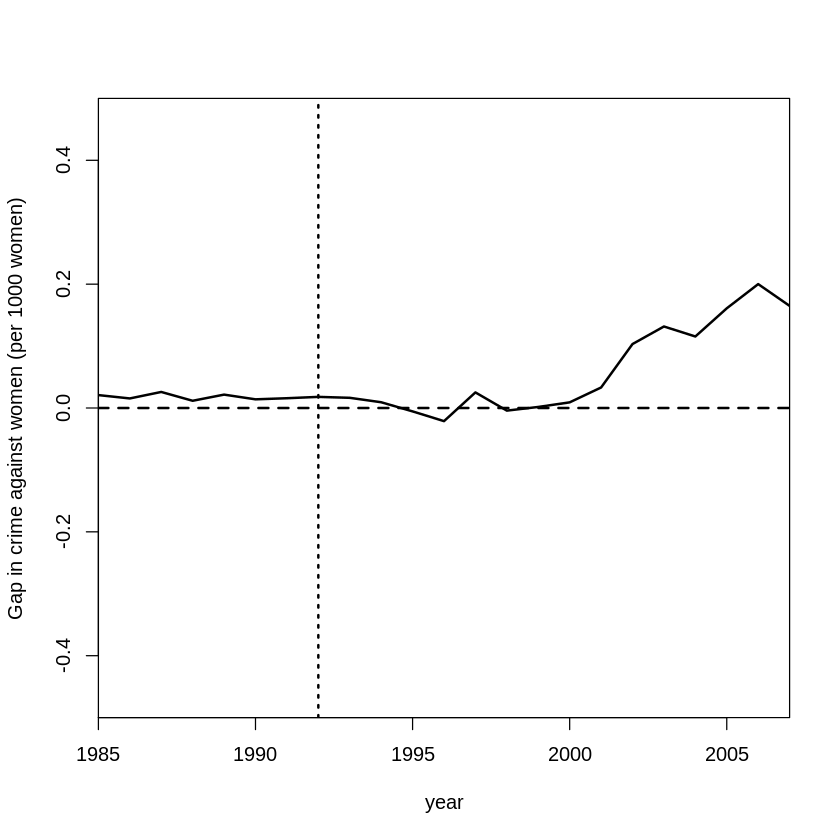

In [ ]:
#gap or difference in treatment and synthetic control
gaps <- dataprep.out$Y1plot - (dataprep.out$Y0plot %*% synth.out$solution.w)

#pre built tables from synth objects
synth.tables <- synth.tab(dataprep.res = dataprep.out, synth.res = synth.out)

#comparing pre-treatment predictor values for the treated unit, the synthetic control unit , and all the units in the sample
synth.tables$tab.pred[1:5,]

#View control unit weights
synth.tables$tab.w

gaps.plot(synth.res = synth.out,
           dataprep.res = dataprep.out,
           Ylab = "Gap in crime against women (per 1000 women)",
           Xlab = "year",
           Ylim = c(-.5,.5),
           Main = NA,
           tr.intake = 1992
           )

#### Placebo in time for all years (1988:2005)

In [ ]:
# placebo in time

store <- matrix(NA, length(1985:2007), length(1988:2005))
colnames(store) <- 1988:2005

for (k in 1988:2005){
  # print(k)
  dataprep.out = dataprep(
    foo = data,
    predictors = c("pcgsdp", "pfemale", "plit","pwlit","prural"),
    predictors.op = "median",
    time.predictors.prior = 1985:k,
    dependent = "pcr_womtot",
    unit.variable = "state",
    time.variable = "year",
    #special.predictors = list(
    #  list("pcgsdp", seq(1985,k,2),"mean"),
    #  list("pfemale", seq(1985,k,2),"mean"),
    #  list("plit",  seq(1985,k,2),"mean"),
    #  list("pwlit",  seq(1985,k,2),"mean"),
    #  list("prural",  seq(1985,k,2),"mean")
    #),
    treatment.identifier = 2,
    controls.identifier = c(1, 3:17),
    time.optimize.ssr = c(1985:k),
    unit.names.variable = c("stateuni"),
    time.plot = c(1985:2007)
  )

  synth.out <- synth(
    data.prep.obj = dataprep.out,
    method = "BFGS"
  )

  # store gaps
  print(k)
  store[, k-1987] <- dataprep.out$Y1plot - (dataprep.out$Y0plot %*% synth.out$solution.w)
}



X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 0.0002899322 

solution.v:
 0.008315458 0.7757674 0.00517139 0.02445318 0.1862926 

solution.w:
 8.9968e-06 9.04408e-05 9.2568e-06 2.46689e-05 0.4348233 0.0001047573 7.1101e-06 9.3e-07 2.69642e-05 5.3939e-06 1.81288e-05 6.70461e-05 4.68922e-05 1.7175e-06 0.5647357 2.86238e-05 

[1] 1988

X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 0.00041043 

solution.v:
 0.008291328 0.1016437 0.3140602 0.431337 0.1446678 

solution.w:
 0.0002341233 7.1999e-06 0.0002794289 0.02144436 0.5684861 0.002483961 0.0002290286 2.959e-07 0.0003719073 0.0002405535 0.0001854 0.004349875 0.0004715499 0.0001612319 0.4004269 0.0006280867 

[1] 1989

X1, X0, Z1, Z0 all come directly from da

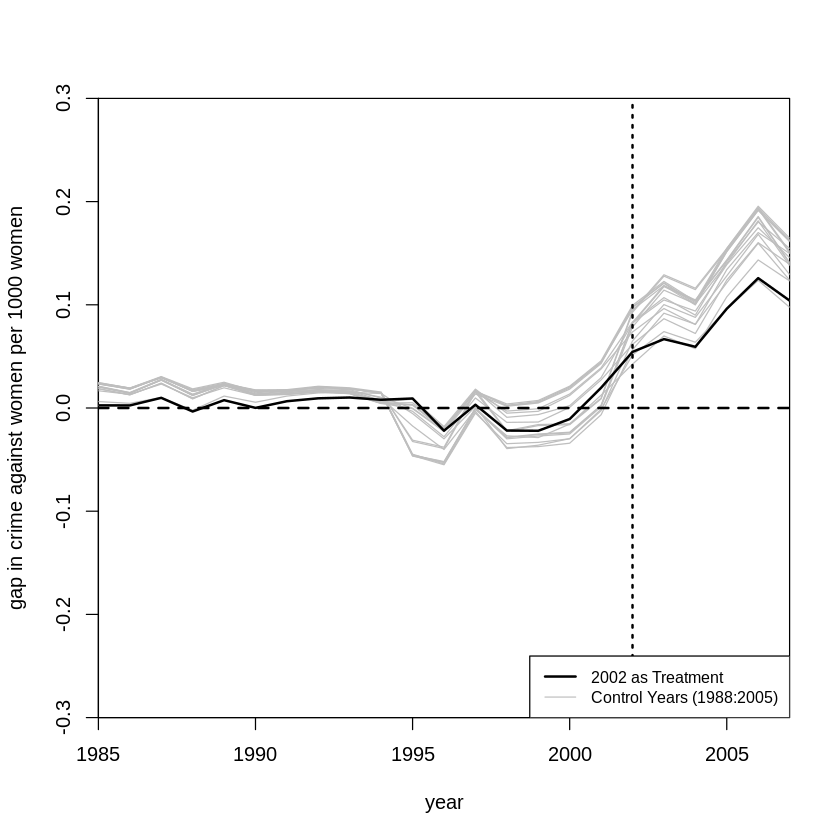

In [ ]:
# now the figure
rownames(store) <- 1985:2007

# set bounds in gaps data:
gap.start <- 1
gap.end <- nrow(store)
years <- 1985:2007
# gap.end.pre <- which(rownames(store)==)


# Plot
plot(c(1,2),c(1,2),
   ylim=c(-0.3,0.3),xlab="year",
   xlim=c(1985,2007),ylab="gap in crime against women per 1000 women",
   type="l",lwd=2,col="black",
   xaxs="i",yaxs="i")

# Add lines for control years 
for (i in 1:ncol(store)) { lines(years,store[gap.start:gap.end,i],col="gray") }

## Add ASSAM Line at 2002 as a treatment year
lines(years,store[gap.start:gap.end,which(colnames(store)==2002)],lwd=2,col="black")

# Add grid
abline(v=2002,lty="dotted",lwd=2)
abline(h=0,lty="dashed",lwd=2)
legend("bottomright",legend=c("2002 as Treatment","Control Years (1988:2005)"),
       lty=c(1,1),col=c("black","gray"),lwd=c(2,1),cex=.8)

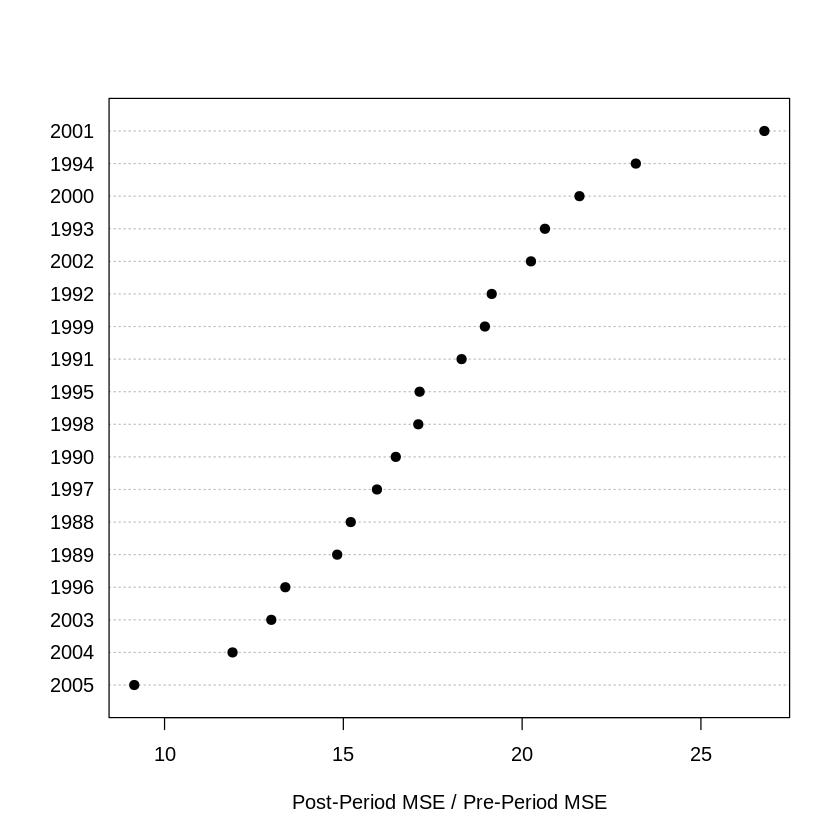

In [ ]:
# dot chart
mse <- function(x){mean(x^2)}

preloss.time = rep(NA,18)
postloss.time = rep(NA,18)
names(preloss.time) = as.character(1988:2005)
names(postloss.time) = as.character(1988:2005)

for (i in 1:ncol(store)){
  treat.year = as.character(i+1987)
  gap.end.pre <- which(rownames(store)==treat.year)
  preloss.time[i] <- mse(store[gap.start:gap.end.pre,2])
  postloss.time[i] <- mse(store[(gap.end.pre+1):gap.end,2])
}


#pdf("2ratio_post_to_preperiod_rmse2a.pdf")
dotchart(sort(postloss.time/preloss.time),
         xlab= "Post-Period MSE / Pre-Period MSE",
         pch=19)

In [ ]:
(postloss.time/preloss.time)[12]